# Домашняя работа №2

In [1]:
import pandas as pd
from scipy import stats
import numpy as np

import seaborn as sns
from sklearn import datasets
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

## Генеральная совокупность и выборка

- Чем отличается генеральная совокупность от выборки?

In [2]:
#Ген совокупность - совокупность всех исследуемых объектов. Выборка - произвольный счетный набор объектов
#из ген совокупности для анализа. Отличаются колчеством объектов =)

- Если размер выборки больше 200, то такая выборка является репрезентативной?

In [3]:
#Неизвестно. Репрезентативность отличает включение всех вохможных видов объектов из ген совокупности
#В примерно одинаковых пропорциях.

- Измерили длину волос футболистов сборной Франции на ЧМ-2018. Что могло являться генеральной совокупностью? Приведите 3 примера.

In [4]:
#1) Длина волос всех футболистов на ЧМ
#2) Длина волос всех футболистов из Франции
#3) Длина волос мужчин из всей французской делегации приехавшей на ЧМ

- Пусть генеральная совокупность --- вес детей, родившихся в Волгограде за последние 10 лет. Предложите 2 стратегии, как сгенерировать выборку.

In [5]:
#1) Взять по 5 произвольных карточек каждого года из всех роддомов Волгограда
#2) Взять по 30 карточек каждого года из 5 различных роддомов

## Параметры центра и разброса

- Постройте распределение, у которого отсутствует мода.


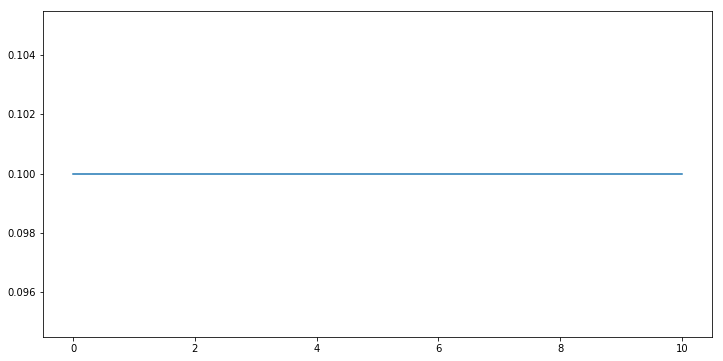

In [11]:
ravn = stats.uniform(0,10)
x = np.linspace(0, 10, 11)

plt.figure(figsize=(12,6))

pdf = ravn.pdf(x)
plt.plot(x, pdf)

In [12]:
#Плотность распределения выглядит как горизонтальная прямая. Потому что все случайные значения равновероятны!

- Какая из статистик (медиана, матожидание) будет наиболее неустойчивой при выбросах? Проверить на выборке из Гамма-распределения. 

In [15]:
gamma_rv = stats.gamma(3, 1)
sample = gamma_rv.rvs(51)
med = sorted(sample)[24]
mean = sample.mean()

#your code here
overshoot = 30
sample_with_overshoot = np.append(sample, overshoot)
new_med = sorted(sample_with_overshoot)[25]
new_mean = sample_with_overshoot.mean()
print('Относительная разница медиан', (new_med-med)/med)
print('Относительная разница матож', (new_mean-mean)/mean)

print('Медиана гораздо устойчивей')

Относительная разница медиан 0.0050361850817870635
Относительная разница матож 0.13160237663394464
Медиана гораздо устойчивей


- Как изменится матожидание, если к выборке добавить константу $C$? Умножить на $C$. 

Проверите на выборке из распределения Пуассона

In [20]:
pois_rv = stats.poisson(2)
sample = pois_rv.rvs(100)
C = 0.5
#your code here
mean = sample.mean()
sample_with_c = np.asarray([x+C for x in sample])
mean_with_c = sample_with_c.mean()
mean_mult_c = mean*C
print('Дефолт матож', mean)
print('Матож (X + С)', mean_with_c) 
print('Матож * С', mean_mult_c)

Дефолт матож 1.89
Матож (X + С) 2.39
Матож * С 0.945


- Как изменится дисперсия при добавлении выбросов? Проверьте для распределения экспоненциального распределения

In [21]:
exp_rv = stats.expon(4)
sample = exp_rv.rvs(50)
var = sample.var()

#your code here
overshoot = 15
sample_with_overshoot = np.append(sample, overshoot)
new_var = sample_with_overshoot.var()
print(var, new_var)

1.1512188451351875 3.001128729508417


- Что шире: интерквантильный размах ($X_{0.75} - X_{0.25}$) или $(\bar{X}-s, \bar{X}+s)$ для $\mathcal{N}(a, \sigma^2)$. Посчитайте и сравните эти интервалы для распредения $\mathcal{N}(3,1)$

In [27]:
norm_rv = stats.norm(3,1)
sample = norm_rv.rvs(1000)
sorted_sample = np.sort(sample)
x_mean = sorted_sample.mean()
x_sko = sorted_sample.std()
InterQuantRazmah = sorted_sample[75]-sorted_sample[25]
FormulaRazmah = (x_mean+x_sko) - (x_mean-x_sko)
print(InterQuantRazmah, FormulaRazmah, x_sko)
print('Размах в два среднеквадратичных отклонения шире чем интерквантильный!')

0.5638200144661849 2.101579090149114 1.0507895450745572
Размах в два среднеквадратичных отклонения шире чем интерквантильный!


# Основные статистики и ЦПТ

- Что такое статистика? Посчитайте любую для бета-распределения (1,3)

In [28]:
#Статистика - измеримая функция любой случайной выборки

In [29]:
beta_rv = stats.beta(1,3)
test1 = beta_rv.rvs(50)
mean_x = test1.mean() 
print('Выборочное среднее равно ', mean_x)

Выборочное среднее равно  0.23667926758879115


- Какие статистики являются оценками матожидания, медианы и дисперсии? Посчитайте их для гамма-распределения с параметрами (2, 2)

In [30]:
#Функции нахождения матожа, медианы и дисперсии, а именно
#Матож = среднее арифметическое всех значений
#Медиана = верхушка на графике распределения, значение с наибольшей вероятностью
#Дисперсия = квадрат среднего отклонения случайной величины от матожа

In [31]:
gamma_rv = stats.gamma(2,2)
test2 = gamma_rv.rvs(50)
#your code here
mean =test2.mean()
var =test2.var()
med =np.median(test2)
print('МАТОЖ =', mean, '  ДИСПЕРСИЯ =', var, '  МЕДИАНА =', med)

МАТОЖ = 4.250719209598798   ДИСПЕРСИЯ = 2.5187377796349844   МЕДИАНА = 3.873099003728698


- Какое распределение имеет $\bar{X}$ по ЦПТ? Если исходное распределение $\mathcal{N}(5, 2)$. Сгенерировать выборки размером 50 из этого распределения и проверить. (построить распределение средних)

In [34]:
#ЦПТ утверждает что распределение принимает НОРМАЛЬНЫЙ ВИД с параметрами N(средний матож, дисперсия/n).

5.002513959083543 0.07935383179925745


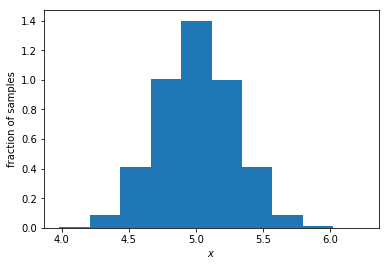

In [39]:
norm_rv = stats.norm(5,2)
n = 50
meansample = []
for i in range(10000):
    sample = norm_rv.rvs(n)
    meansample.append(sample.mean())
mean_s = np.asarray(meansample).mean()
disp_s = np.asarray(meansample).var()
plt.hist(meansample,density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')
print(mean_s, disp_s)

In [40]:
#Наблюдения соответствуют ЦПТ! Прикольно!

- Сгенерируйте выборки так, чтобы ЦПТ не выполнялось (распределение средних не было похоже нормальное)

Text(0.5, 0, '$x$')

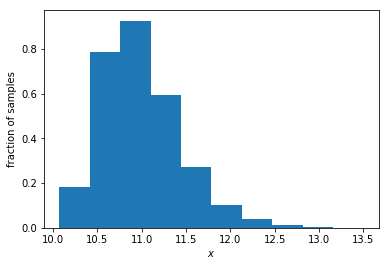

In [45]:
norm_rv = stats.expon(10)
n = 5
meansample = []
for i in range(10000):
    sample = norm_rv.rvs(n)
    meansample.append(sample.mean())

plt.hist(meansample,density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

In [47]:
#ЦПТ принимает вид исходного распределения, если выборки малы. Выше пример экспоненциального распределения.

- Сделайте z-преобразование для данного распределения и посчитайте новое матожидание и дисперсию 

In [126]:
expon_rv = stats.expon(3)
exp_sample = expon_rv.rvs(100)
new_rv = np.array([(x - exp_sample.mean())/(exp_sample.var()**0.5) for x in exp_sample])
print(new_rv.mean(), new_rv.var())

6.694644838489694e-16 0.9999999999999999


## Доверительные интервалы и гипотезы

В данных задачах используйте встроенную функцию, позволяющую искать квантили случайной величины **your_rv**.ppf, а также https://gallery.shinyapps.io/dist_calc/ для визуальной картины

- Постройте 90% доверительный интервал для среднего значения $\mathcal{\chi^2_{10}}$.

In [152]:
chi_rv = stats.chi2(10)
n =100
ch2_sample = chi_rv.rvs(n)
chi_mat = ch2_sample.mean()
chi_var = ch2_sample.var()
sigma_chi = chi_var ** 0.5
t1 = chi_mat - sigma_chi/(n**0.5)*1.64
t2 = chi_mat + sigma_chi/(n**0.5)*1.64
print('Доверительный интервал', t1, t2, t2-t1)

Доверительный интервал 9.970648093602655 11.618680256175253 1.6480321625725978


- Постройте ДИ для распределения Стьюдента с df = 15 уровня доверия 90%  и 95%. Какой интервал шире?

In [151]:
stu_rv = stats.t(15)
n=100
stu_sample = chi_rv.rvs(n)
stu_mat = stu_sample.mean()
stu_var = stu_sample.var()
sigma_stu = stu_var ** 0.5
t1_90 = chi_mat - sigma_chi/(n**0.5)*1.64
t2_90 = chi_mat + sigma_chi/(n**0.5)*1.64
t1_95 = chi_mat - sigma_chi/(n**0.5)*1.96
t2_95 = chi_mat + sigma_chi/(n**0.5)*1.96

print('Доверительный интервал для уровня доверия 90%', t1_90, t2_90)
print('Доверительный интервал для уровня доверия 95%', t1_95, t2_95)
print('Шире интервал для уровня доверия 95%', t2_90-t1_90, t2_95-t1_95)

Доверительный интервал для уровня доверия 90% 9.36607358931351 10.742207479889563
Доверительный интервал для уровня доверия 95% 9.231816624379261 10.876464444823812
Шире интервал для уровня доверия 95% 1.3761338905760532 1.6446478204445505


- Сгенерируйте 2 выборки с одинаковыми параметрами, отличающиеся в 2 раза по размеру. Постройте 2 90% ДИ. Чем они отличаются? Распределение $\mathcal{N}(0,2)$ 

In [159]:
norm_rv = stats.norm(0, 2)
n1 = 1000
n2 = 2000
vib1 = norm_rv.rvs(n1)
vib2 = norm_rv.rvs(n2)
vib1_mat = vib1.mean()
vib1_var = vib1.var()
vib1_sigma = vib1_var ** 0.5
v11_90 = vib1_mat - vib1_sigma/(n1**0.5)*1.64
v12_90 = vib1_mat + vib1_sigma/(n1**0.5)*1.64
vib2_mat = vib2.mean()
vib2_var = vib2.var()
vib2_sigma = vib2_var ** 0.5
v21_90 = vib2_mat - vib2_sigma/(n2**0.5)*1.64
v22_90 = vib2_mat + vib2_sigma/(n2**0.5)*1.64

print('Доверительный интервал для маленькой выборки', v11_90, v12_90)
print('Доверительный интервал для большой выборки', v21_90, v22_90)
print('Чем больше выборка, тем уже(достоверней) дов интервал', v12_90 - v11_90, v22_90-v21_90 )


Доверительный интервал для маленькой выборки -0.2084679529197726 -0.00412373994144484
Доверительный интервал для большой выборки 0.024222127003950933 0.17459255004329524
Чем больше выборка, тем уже(достоверней) дов интервал 0.20434421297832778 0.1503704230393443


- Пусть $H_0: M=100$. Мы получили $p = 0,12$ и не смогли отклонить нулевую гипотезу. Однако позже выяснилось, что среднее в генеральной совокупности равняется 114. Ошибку какого рода мы допустили?

In [ ]:
#Ошибку второго рода. Неверная гипотеза была принята!

#### Какие рассуждения относительно p-value верные?

- Елси p уровень значимости равен 0,003, то вероятность того, что верна нулевая гипотеза также равняется  0,003.
- Если бы в исследовании мы получили $p=0,9$, это означало бы, что верна нулевая гипотеза.
- Чем меньше p уровень значимости, тем хуже гипотеза.


In [110]:
#1) Неверно, это вероятность, что случайная величина попадет в заданный промежуток
#2) Неверно, это значит что на данном этапе мы ее не отвергаем
#3) Неверно, тем меньше вероятность, что распределение сл величины будет такое же (в тех интервалах) что и ранее 

- Какое $p$-value будете использовать, если отклонять $H_0$ рисковано: $0.05$ или $0.01$? Является ли 99% доверительный интервал хорошей оценкой в общем случае?

In [111]:
#1) 0.01
#2) Нет, даже 95% многовато, интерквантильный размах - самое то! 
#Чем шире интервал, тем больше экстремальных значений он захватывает!

## Стьюдент и корреляция

- Изобразите графики плотности распределения Стьюдента для нескольких значений df= (5,10, 20, 40) и $\mathcal{N}(0,1)$. В чем отличия?

Чем больше степеней свободы, тем ближе распределение к нормальному


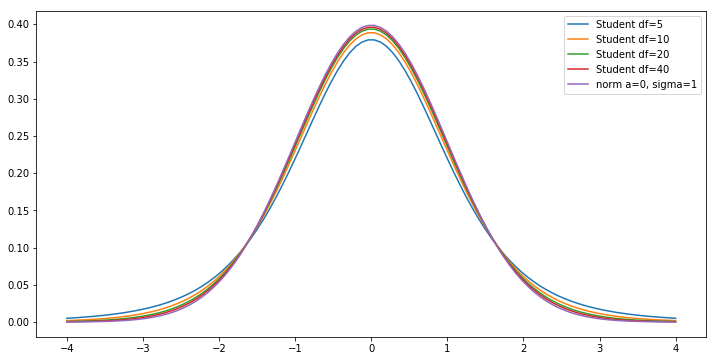

In [135]:
norm = stats.norm(0, 1)
t1 = stats.t(5)
t2 = stats.t(10)
t3 = stats.t(20)
t4 = stats.t(40)
x = np.linspace(-4, 4, 100)

plt.figure(figsize=(12,6))

pdf = t1.pdf(x)
plt.plot(x, pdf)

pdf_2 = t2.pdf(x)
plt.plot(x, pdf_2)

pdf_3 = t3.pdf(x)
plt.plot(x, pdf_3)

pdf_4 = t4.pdf(x)
plt.plot(x, pdf_4)

pdf_norm = norm.pdf(x)
print('Чем больше степеней свободы, тем ближе распределение к нормальному')
plt.plot(x, pdf_norm)

plt.legend(['Student df=5', 'Student df=10','Student df=20','Student df=40', 'norm a=0, sigma=1'])


- Постройте две выборки, чтобы их корреляция была равна -1. Изобразите зависимость на графике.

[[ 1. -1.]
 [-1.  1.]]


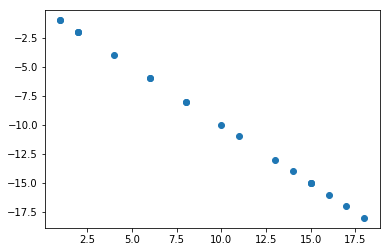

In [124]:
a = np.random.randint(0, 20, 20)
b = np.asarray([x*-1 for x in a])
corr_coe = np.corrcoef(a,b)
plt.scatter(a,b)
print(corr_coe)

- Постройте две выборки, чтобы их корреляция была равна 0. Изобразите зависимость на графике.

[[ 1.         -0.00555405]
 [-0.00555405  1.        ]]


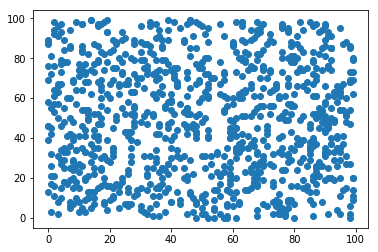

In [125]:
a = np.random.randint(0, 100, 1000)
b = np.random.randint(0, 100, 1000)
corr_coe = np.corrcoef(a,b)
plt.scatter(a,b)
print(corr_coe)

- Сгенерируйте 2 выборки из $\mathcal{N}(4,2)$, посчитайте их общий ранг и сумму рангов в каждой выборке.

In [127]:
norm_rv = stats.norm(4,2)
sample_1 = norm_rv.rvs(100)
sample_2 = norm_rv.rvs(100)
sample = np.concatenate((sample_1, sample_2))
sum_rang = sum(stats.rankdata(sample))

print(sum_rang)

20100.0
